In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image

# LOGISTIC REGRESSION

The goal of binary logistic regression is to train a classifier that can make a binary decision about the class of a new input observation.


1. The logistic regression model is a linear model for binary classification.  
 
    - Binary: True or False, Yes or No, 1 or 0 etc.  
 
    - Essentially used to classify an observation into one of two classes   
  
  
2. Notably, it can be extended to multiclass classification   

    - Softmax (mulitnomial) regression is a generalisation of Logistic regression 
  
  
3. It is a **discriminative classifier** meaning it only tries to learn to distinguish the classes.   

  
    - Generative classifiers (Naive Bayes) goal is of understanding what are the characteristic of each class (Generate an image)  
  
  


## Probabalistic Models

To explain logistic regression as a probabilistic model I will introduce the odds ratio (odds in favor of a particular event normally the positive event y = 1).
  
$$odds = \frac{p}{1-p}$$

Furthermore, the **logit function** is simply the logarithm (natural log) of the odds ratio (log-odds):
  
$$logit = log\frac{1}{1-p}$$

The logit function takes as input values in the range 0 to 1
- transforms them to values over the entire real-number range  
  
  
- this transformation can be used to express a linear relationship between feature values and the log-odds  
  
  
- Here, $p( y =1| x)$ is the conditional probability that a particular sample belongs to
class 1 given its features x.
  
$$logit(p(y=1|x)) = w_0x_0+w_1x_1+...+w_mx_m $$  
  
  
$$= \sum_{i=1}^{m} w_ix_i $$  
  
  
$$= {\theta^Tx}$$

To convert Log-odds back to odds we take the exponent of the log(odds):   
  
$$exp(log(odds))$$
  
Finally, converting Odds back to probability: $$\frac{odds}{1+odds} = \frac{e^{log(odds)}}{1+e^{log(odds)}} = \frac{1}{1+e^{-log(odds)}} $$    
  
  
  
  
$$= Sigmoid Function$$



## Candidate best linear fit and candidate log-odds
#### Why odds, log-odds and not probability

 - Notably, our y labled data is binary: $y_i\in \{0,1\}$

- Therefore, we need to be able to take input values in the range of 0,1 and transform them to values over the entire real-number range allowing us to fit a candidate best fit linear relationship between the feature values and the candidate log-odd values.


   Range of probability = [0,1] 
   
   Range of odds = $[0,\infty]$
 
   Range of log-odds = $[-\infty,\infty]$
 
 
- A Candidate best fit line (similar to Linear Regression) can be implemented with the projection of the data points onto the trend line that tend to +-infinity on that line. This allows us to obtain the candidate log-odds for each observation. Applying the Sigmoid Function on the log-odd values maps the values into probabilities ranging between 0 to 1.  
  
  

- Now, we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the EXPONENT form of the logit function. It is also called logistic sigmoid function:   
  
$$Sigmoid = \frac{1}{1+e^{-z}}$$


In [38]:
# Python implementation
def sigmoid(z):
        return 1/(1+np.exp(-z))

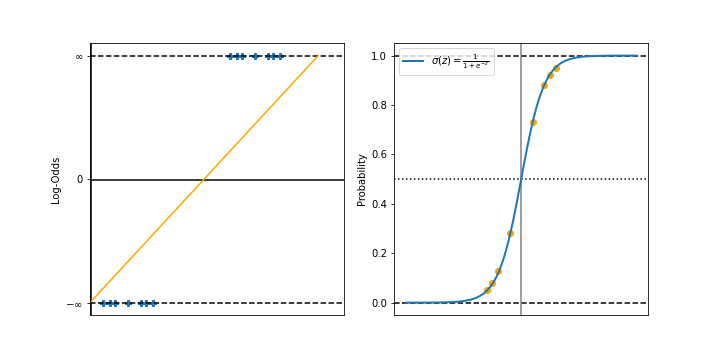

In [7]:
Image('logreg.png') # matplotlib code displayed in Appendix

# Maximum Likelihood Estimation
### How well does our sinusoidal (S-shaped) curve fit our data 

Estamating the parameteres of a probability distribution by maximising a likelihood function so that under the assumed statistical model the observable data is most probable.

- We do this via a loss function that prefers the correct class labels of the training examples to be more likely. This is called conditional maximum likelihood.  
  
  

- Therefore, we choose the parameters that maximize the log probability of the true y labels in the training data given the observations x. The resulting loss function is the negative log likelihood loss, generally called the cross-entropy loss.
  
The best fit candidate line is achieved by rotating it as done in linear regression until we achieve a sinusoidal curve that best classifies our data (selecting the curve with highest **"Maximum Likelihood Estimation"**.

$$MLE = \prod_{i:y{(i)}=1}^{m} p(x_i). \prod_{i:y{(i)}=0}^{m} (1-p(x_i) $$

# Probability of Belonging to Class 1

Now, we are actually interested in predicting the probability that a certain sample
belongs to a particular class, which is the EXPONENT form of the logit function. It is
also called logistic sigmoid function: $$Sigmoid = \frac{1}{1+e^{-z}}$$

Noting that z (as shown above):
$$z = \sum_{i=1}^{m} w_ix_i = {\theta^Tx}$$

The output of the sigmoid function is then interpreted as the probability of a
particular sample belonging to class 1, $P(y=1|x;w)$, given its features x
parameterized by the weights w.

We want to know the probability that an observation is a member of a class

$$P({y = 1|x; \theta}) = \sigma({\theta^Tx})$$
  
$$P({y = 0|x; \theta}) = 1-\sigma({\theta^Tx})$$

- Wow $\sigma({\theta^Tx})$ looks very similar to our hypothesis for Linear Regression but what is $\sigma$?

The predicted probability can then simply be converted into a binary
outcome via a threshold function:

$$ \hat{y} =
  \begin{cases}
    1       & \quad \text{if } \sigma({\theta^Tx})\geq0.5\\
    0 & \quad \text{otherwise }
  \end{cases}
$$

## Descision Boundary


$$ \hat{y} =
  \begin{cases}
    1       & \quad \text{if } \hat{y} \geq 0.5\\
    0  & \quad \text{if } \hat{y} < 0.5
  \end{cases}
$$


# Generalised Linear Model
Logistic regression is a **GLM** in terms of being a generalisation of linear regression for classification whereby it uses a **link function** (Sigmoid Function) to map outputs into probabilities [0,1]
  
This is because: $$y_i\in \{0,1\}$$
       
**Linear Regression Hypothesis**: $$h(x) =\theta^Tx$$
**Logistic Regression Hypothesis**: $$h(x) = \sigma({\theta^Tx})$$

Therefore, for logistic regression we want our hypothesis:
$$ 0\leq h_\theta(x) \leq 1$$

Where our link function is the Sigmoid function: $$\sigma = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-\theta^Tx}}$$  
  
- Now we know what $\sigma$ denotes  
  
  
Noting that z (as shown above):
$$z = \sum_{i=1}^{m} w_ix_i = {\theta^Tx}$$



  
The linear part of the model predicts the log-odds of an example belonging to class 1, which is converted to a probability via the logistic function.

We need a loss function that expresses, for an observation x, how close the classifier
output is to the correct output which is 0 or 1
  
$$\hat{y} = \sigma({\theta^Tx})$$

Notably, how much the predicted $\hat{y}$ differes from the true y will be denoted as folows:  
  
  
$$L(\hat{y},y)$$  


## Bernoulli Distribution

Since there are only two discrete outcomes (1 or 0), this is a Bernoulli distribution, and we can
express the probability $p(y|x)$ that our classifier produces for one observation as
the following:
$$P(y|x) = \hat{y}^y.(1-\hat{y})^{1-y}$$

# COST FUNCTION
### Learning the weights $\theta/w$ of the logistic cost function by argmin our cost function

For linear regression we defined the sum-of-squared-errors cost function as:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$$

Notably is we used least squares for our logistic cost function we would encounter a non-convex cost function will numerous local minima/maxima.

$$L(w) = P(y|x;\theta) =  \prod_{i=1}^{n} (\sigma(\theta^Tx^{(i)}))^{y^{(i)}} \prod_{i=1}^{n} (1-\sigma(\theta^Tx^{(i)}))^{1-y^{(i)}}$$

Notably this is the same as our Bernoulli illustrated above and if we take the probability that an observation is a member of a class: 

$$Bernoulli = P(y|x) = \hat{y}^y.(1-\hat{y})^{1-y}$$

$$Class 1 = P({y = 1|x; \theta}) = \sigma({\theta^Tx})$$
  
$$Class 2 = P({y = 0|x; \theta}) = 1-\sigma({\theta^Tx})$$
 
$$P({y^{(i)} = k|x^{(i)}; \theta}) = (\sigma({\theta^Tx^{(i)}}))^{y^{(i)}}.[1-(\sigma({\theta^Tx^{(i)}}))^{1-y^{(i)}}$$

In practice, it is easier to maximize the (natural) log of this equation, which is called
the log-likelihood function: 

$$l(w) = logL(w) = \sum_{i=1}^{m}[y^{(i)}log(\hat{y}^{(i)})+(1-y)log(1-\hat{y}^{(i)})]$$

### Cross Entropy Loss/ Negative Log Likelihood Loss
#### Taking the log of each side of our bernoulli
Now we could use an optimization algorithm such as gradient ascent to maximize
this log-likelihood function.

$$L_{CE}(\hat{y},y) = -[ylog(\hat{y}).(1-y)log(1-\hat{y})]$$
$$l(w) = logL(w) = \sum_{i=1}^{m}[y^{(i)}log(\hat{y}^{(i)})+(1-y)log(1-\hat{y}^{(i)})]$$

Alternatively

We want to know the probability that an observation is a member of a class

$$P({y = 1|x; \theta}) = \sigma({\theta^Tx})$$
  
$$P({y = 0|x; \theta}) = 1-\sigma({\theta^Tx})$$

Therefore: 
$$P({y^{(i)} = k|x^{(i)}; \theta}) = (\sigma({\theta^Tx^{(i)}}))^{y^{(i)}}.[1-(\sigma({\theta^Tx^{(i)}}))^{1-y^{(i)}}$$

$$LL(\theta) = -[ylog(\sigma({\theta^Tx^{(i)}}).(1-y)log(1-\sigma({\theta^Tx^{(i)}})]$$

However, we will rewrite the log-likelihood as a cost
function J that can be minimized using gradient descent:
$$J(w)= \sum_{i=1}^{m}-[y^{(i)}log(\hat{y}^{(i)})+(1-y)log(1-\hat{y}^{(i)})]$$

Importantly, we can see that when $y=0$ the first term $ylog(\hat{y})$ becomes zero, and when $y=1$ for the second term $(1-y)log(1-\hat{y})$ becomes zero.

Therefore, $$ J(\theta) =
  \begin{cases}
    -log(\hat{y})       & \quad \text{if } y = 1\\
    -log(1-\hat{y})  & \quad \text{if } y = 0
  \end{cases}
$$


In [40]:
def loss_function(X, weight):
    y_hat = self.sigmoid(X@weight)
    loss = np.mean((np.dot(-y,np.log(y_hat)) - np.dot((1-y),np.log(1-y_hat))))
    return loss

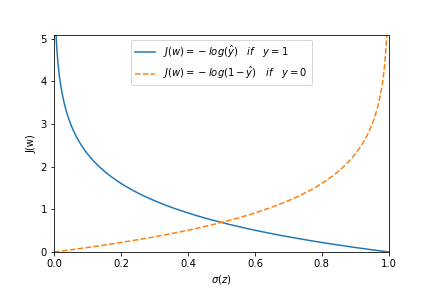

In [18]:
Image(filename='sigmoid.png')

The cost apporahces zero if we correctly predict a sample belongs to class 1: $-log(1) = 0$.
  
Additionally, the cost apporahces zero if we correctly predict a sample does not belong to class 1: $-log(1-0) = 0$ 

However, if we incorrectly predict the sample, the cost tends towards infinity. Therefore, we penalize wrong predictions at an increasingly larger cost.


### To Fit Parameteres
We need to: $$ min_\theta J(\theta) = \hat{\theta} = argmin_\theta \frac{1}{m}\sum_{i=1}^{m}L_{CE}(f(x^{(i)};\theta),y^{(i)})$$


## Gradient Descent 
Our goal with gradient descent is to find the optimal weights: minimize the loss
function we’ve defined for the model (iteratively update our weight vector)

$$\theta_j:= \theta_j - \alpha\frac{\partial}{\partial w} \left( J(\theta) \right)$$

## Derivative of Our cost function

The partial derivative of our **Sigmoid function** $\sigma(z)$:

$$\frac{\partial}{\partial z}\sigma(z) = \sigma(z).(1-\sigma(z))$$

Minimising our Cost function:
$$J(\theta) = -[ylog(\sigma({\theta^Tx^{(i)}}).(1-y)log(1-\sigma({\theta^Tx^{(i)}}))]$$

$$\frac{\partial}{\partial w_j}J(\theta) = -[ylog(\sigma({\theta^Tx^{(i)}}).(1-y)log(1-\sigma({\theta^Tx^{(i)}})]\frac{\partial}{\partial w_j}\sigma(z)$$

$$\frac{\partial}{\partial x_j}J(\theta) = [\frac{y}{\sigma(\theta.x^{(i)})}-\frac{1-y}{1-\sigma(\theta.x^{(i)})}](\sigma(z))[(1-\sigma(z))]\frac{\partial}{\partial w_j}z$$

$$(y(1-\sigma(\theta.x^{(i)}))-(1-y)\sigma(\theta.x^{(i)})x_j)$$

$$X^T(\sigma(w^Tx)-y)$$

Therefore, our gradient descent update rule is: 

$$\theta_j:= \theta_j - \alpha \sum_{i=1}^{m} x^T(\sigma(w^Tx^{(i)})-y^{(i)})$$

or, 

$$ \text{repeat until converge} =
  \begin{cases}
    \theta_j :=\theta_j - \alpha [\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^{(i)})-y^{(i)}){x_j}^{(i)}]
  \end{cases}
$$

Where $\alpha$ is our learning rate.

# Avoiding Overfitting through Regularization

We want to avoid overfitting our training data as this results in a complex model that does not gerneralize well.
- Low Bias (performs well on training data).
- High variance (does not generalize well to unseen testing data) 
  
The idea behind introducing regularization into our model is to penalize extreme parameter (weight) values. We are looking for smoother decision boundaries.

**L2 Regularization** refered to as Ridge regression in our Linear regression notebook is written as:
$$\frac{\lambda}{2}||w||^2 = \frac{\lambda}{2}\sum_{j=1}^{m}{\theta_j}^2$$

Notably, we control the degree of regularization with $\lambda$. If $\lambda = 0$ we have normal logistic regression with no regularisation.

# Regularized Logistic Regression Cost Function

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[ylog(\sigma({\theta^Tx^{(i)}}).(1-y)log(1-\sigma({\theta^Tx^{(i)}}))]+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_j}^2$$

### Derivative of our New Cost Function

$$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{\partial}{\partial \theta_j}[-\frac{1}{m}\sum_{i=1}^{m}(ylog(\sigma({\theta^Tx^{(i)}}).(1-y)log(1-\sigma({\theta^Tx^{(i)}})))+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_j}^2]$$
  
$$\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^{(i)})-y^{(i)}){x_j}^{(i)}+\frac{\lambda}{m}\theta_j$$

The only difference is that we are just taking the derivative of the **L2** term:
$$\frac{\partial}{\partial \theta_j}L2 =  \frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_j}^2 = \frac{\lambda}{m}\theta_j$$

#### New Gradient Descent Update Rule

$$ \text{repeat until converge} =
  \begin{cases}
    \theta_0 :=\theta_0 - \alpha [\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^{(i)})-y^{(i)}){x_0}^{(i)}]\\
    \theta_j :=\theta_j - \alpha [\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^{(i)})-y^{(i)}){x_j}^{(i)}+ \frac{\lambda}{m}\theta_j ]
  \end{cases}
$$

Notably, in the instance of $j=0$, there is no regularization term included as $x_0 = 1$ (normally our intercept). This is consistent with the convention followed for regularization.


# Regularized Logistic Regression Through Stochastic Gradient Descent

In [54]:
iris = sns.load_dataset('iris')
y = iris.iloc[0:75,4]
y = np.where(y == 'setosa', 0, 1)
X = iris.iloc[0:75, [0, 2]].values

In [34]:
class LogisticRegressionClassifier():
    """Logistic Regression Classifier using Stochastic Gradient Descent.
    
    Parameters
    -----------
    eta : float
        learning rate (between 0.0 to 1.0)
    epochs: int  
        number of passess over training dataset
    tol: float
        tolerence 
    penalty: int
        strength of regularization

    """
    def __init__ (self, eta=0.1,epochs=40,tol= 1e-4,penalty=1):
        # GD params
        self.eta = eta
        self.epochs = epochs
        self.tol = tol
        self.penalty = penalty
    
        #design matrix
        self.center = True
        self.add_intercept = True
        self.scale = True
        
        self.traiing_loss_history = []
        
    def design_matrix(self,X):
        if self.center:
            X = X - self.means
        if self.scale:
            X = X/self.standard_error
        if self.add_intercept:
            X = np.c_[np.ones((len(X))),X]
            
        return X
    
    def fit_center_scale(self,X):
        self.means = np.mean(X,axis=0)
        self.standard_error = np.std(X,axis=0)
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    
    def fit(self,X,y):
        """Fit training data.
        Parameters
        -------------
        X: {array-like} - shape = [n_samples, n_features]
            Training Values
        y: {array-like} - shape = [n_samples]
            Target Values
        """
        self.fit_center_scale(X)
        sigmoid = self.sigmoid
        
        #add intercept to design matrix
        n,m = X.shape
        X = self.design_matrix(X)
        
        
        #convergence check
        previous_loss = -float('inf')
        self.converged = False
        
        #initialise parameters
        weight = np.zeros(m + (1 if self.add_intercept else 0))
        
        for epoch in range(self.epochs):
            for i in range(n):
                random_index = np.random.randint(n)
                Xi = X[random_index:random_index+1]
                Yi = y[random_index:random_index+1]
                Z = np.dot(Xi,weight)
                A = sigmoid(Z)
                gradient= np.dot(Xi.T,(A-Yi)) 
                gradient[1:] += (self.penalty/n) * weight[1:]
                self.learning_rate = self.learning_schedule(epoch * n + i)
                #self.loss = np.mean((np.dot(-Yi,np.log(A)) - np.dot((1-Yi),np.log(1-A))))
    
                weight -= self.eta * gradient
 
                #self.traiing_loss_history.append(self.loss)
            
                # convergence check
            y_hat = self.sigmoid(X@weight)
            loss = np.mean((np.dot(-y,np.log(y_hat)) - np.dot((1-y),np.log(1-y_hat))))
            reg = (self.penalty/(2*n))*(weight[1:].T@weight[1:])
            self.loss = loss + reg
            
            if abs(previous_loss - self.loss) < self.tol:
                self.converged = True
                break
            else:
                previous_loss = self.loss
            self.traiing_loss_history.append(self.loss)
            
        self.weight = weight
        self.iterations = i+1
        
        return self
        
    def predict_proba(self, X):
        # add intercept column to the design matrix
        X = self.design_matrix(X)
        Z = np.dot(X,self.weight)
        return self.sigmoid(Z)   
        
    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype(int)
    
    def learning_schedule(self,t,t0 =5, t1 = 50):
        return t0 / (t + t1)

<AxesSubplot:>

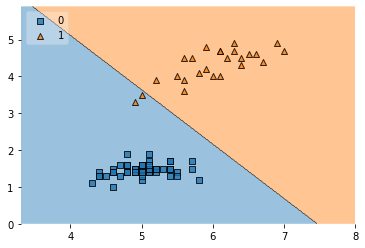

In [35]:
logreg = LogisticRegressionClassifier(eta=0.001,penalty=10)
logreg.fit(X,y)
plot_decision_regions(X, y, clf=logreg, legend=2)